In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from os import listdir

In [4]:
arc_list = listdir('results_99/')

prob_list = []
eda_list = []

for arc in arc_list:
    if arc.split('__')[0] == 'weighted_EDA':
        eda_list.append(arc)
    elif arc.split('__')[0] == 'posterior_EDA':
        prob_list.append(arc)
        
print(len(eda_list))
print(len(prob_list))

99
99


In [5]:
y = np.genfromtxt('results_99/target.csv')

distances_dict={
    'euclidean':{
        'eda':{
            'bc': np.zeros((int(len(y[y==0])))),
            'tn': np.zeros((int(len(y[y==-1])))),
            'sg': np.zeros((int(len(y[y==1])))),
            'ct': 0
        },
        'posterior':{
            'bc': np.zeros((int(len(y[y==0])))),
            'tn': np.zeros((int(len(y[y==-1])))),
            'sg': np.zeros((int(len(y[y==1])))),
            'ct': 0
        }
    },
    'cosine':{
        'eda':{
            'bc': np.zeros((int(len(y[y==0])))),
            'tn': np.zeros((int(len(y[y==-1])))),
            'sg': np.zeros((int(len(y[y==1])))),
            'ct': 0
        },
        'posterior':{
            'bc': np.zeros((int(len(y[y==0])))),
            'tn': np.zeros((int(len(y[y==-1])))),
            'sg': np.zeros((int(len(y[y==1])))),
            'ct': 0
        }
    },
    'mahalanobis':{
        'eda':{
            'bc': np.zeros((int(len(y[y==0])))),
            'tn': np.zeros((int(len(y[y==-1])))),
            'sg': np.zeros((int(len(y[y==1])))),
            'ct': 0
        },
        'posterior':{
            'bc': np.zeros((int(len(y[y==0])))),
            'tn': np.zeros((int(len(y[y==-1])))),
            'sg': np.zeros((int(len(y[y==1])))),
            'ct': 0
        }
    }
}

for arc in eda_list:
    distance = arc.split('__')[2].split('.')[0]
    eda = np.genfromtxt('results_99/'+arc,delimiter=',')
    
    if len(eda) == 10000:
        # Sum of EDA results
        distances_dict[distance]['eda']['bc']+= np.sort(eda[y==0])
        distances_dict[distance]['eda']['tn']+= np.sort(eda[y==-1])
        distances_dict[distance]['eda']['sg']+= np.sort(eda[y==1])
        distances_dict[distance]['eda']['ct']+= 1

for dist in distances_dict:
        
    # Dividing by the number of results    
    distances_dict[distance]['eda']['bc'] /= distances_dict[distance]['eda']['ct']
    distances_dict[distance]['eda']['tn'] /= distances_dict[distance]['eda']['ct']
    distances_dict[distance]['eda']['sg'] /= distances_dict[distance]['eda']['ct']
    
for arc in prob_list:
    distance = arc.split('__')[2].split('.')[0]
    prob = np.genfromtxt('results_99/'+arc,delimiter=',')
    
    if len(prob) == 10000:
        # Sum of probability results
        distances_dict[distance]['posterior']['bc']+= np.sort(prob[y==0])
        distances_dict[distance]['posterior']['tn']+= np.sort(prob[y==-1])
        distances_dict[distance]['posterior']['sg']+= np.sort(prob[y==1])
        distances_dict[distance]['posterior']['ct']+= 1
    
# Dividing by the number of results    
distances_dict[distance]['posterior']['bc'] /= distances_dict[distance]['posterior']['ct']
distances_dict[distance]['posterior']['tn'] /= distances_dict[distance]['posterior']['ct']
distances_dict[distance]['posterior']['sg'] /= distances_dict[distance]['posterior']['ct']

In [6]:
distances_dict

{'euclidean': {'eda': {'bc': array([5.64628467e-02, 1.24555570e-01, 1.93371334e-01, ...,
          1.91904764e+02, 1.91904917e+02, 1.91904937e+02]),
   'tn': array([  0.21691417,   0.27017254,   0.33061102, ..., 191.90491738,
          191.90494163, 191.90495228]),
   'sg': array([ 29.59311092,  45.11699287,  54.99013436,  68.0519136 ,
           79.17771481,  88.21582823,  98.86987255, 105.93900845,
          113.98111389, 121.9505143 , 129.65112562, 134.25115329,
          139.82004047, 144.70545654, 148.2777425 , 153.12519459,
          157.7984892 , 164.56214549, 169.14174545, 173.72117232,
          175.51370671, 177.04871201, 179.54613409, 182.09009193,
          184.25478196, 187.38267194, 188.49585985, 189.94435921,
          191.19482968, 191.74100836]),
   'ct': 33},
  'posterior': {'bc': array([7.40746793e-06, 1.62543096e-05, 2.52508634e-05, ...,
          3.95765293e-02, 3.95765471e-02, 3.95765670e-02]),
   'tn': array([2.75716878e-05, 3.44951936e-05, 4.37592940e-05, ...,
 

euclidean
       fitted kde
        plotted
cosine
       fitted kde
        plotted
mahalanobis
       fitted kde
        plotted


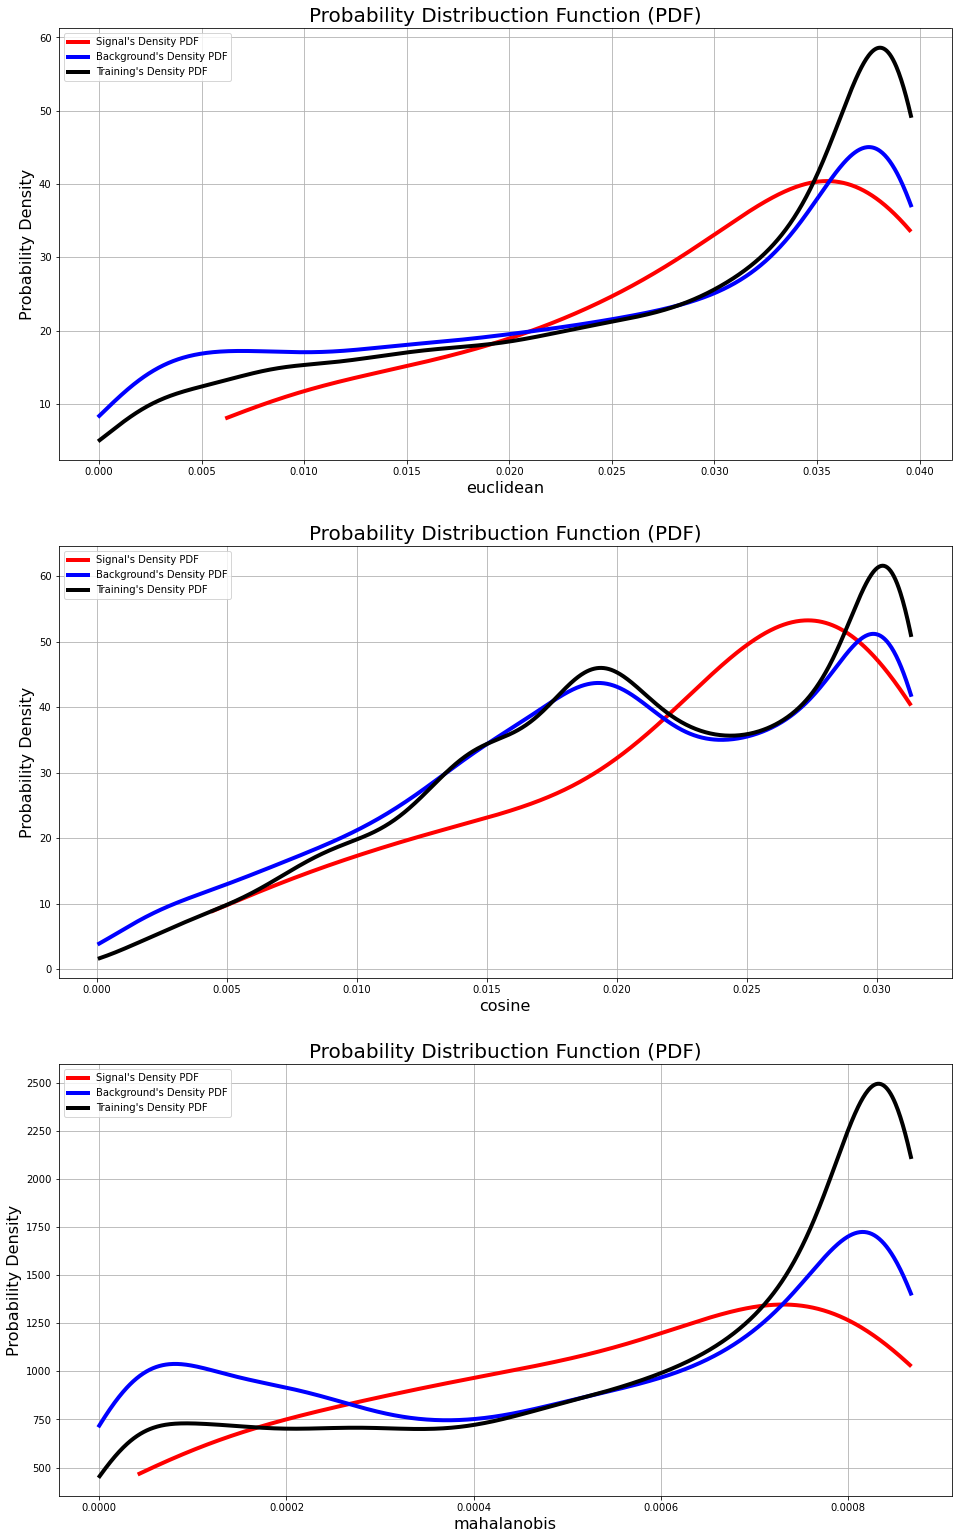

In [7]:
fig = plt.figure(figsize=[16,9*(len(distances_dict))])
ax = fig.subplots(len(distances_dict))

for i, att in enumerate(distances_dict):
    print(att)
        
    signal_streaming_var = distances_dict[att]['posterior']['sg']
    background_streaming_var = distances_dict[att]['posterior']['bc']
    training_var = distances_dict[att]['posterior']['tn']
    
    signal_streaming_var = np.sort(signal_streaming_var)
    background_streaming_var = np.sort(background_streaming_var)
    training_var = np.sort(training_var)

    signal_kde = stats.gaussian_kde(signal_streaming_var)
    background_kde = stats.gaussian_kde(background_streaming_var)
    training_kde = stats.gaussian_kde(training_var)
    
    print('       fitted kde')
    
    training_eval = np.linspace(min(training_var),
                            max(training_var),
                            1000)
    
    background_eval = np.linspace(min(background_streaming_var),
                            max(background_streaming_var), 
                            1000)
    
    signal_eval = np.linspace(min(signal_streaming_var),
                              max(signal_streaming_var),
                              1000)

    # Plot the Probability Distribuction Function (PDF)
    
    ax[i].set_ylabel('Probability Density',fontsize=16)
    ax[i].set_xlabel(att,fontsize=16)
    ax[i].set_title('Probability Distribuction Function (PDF)',fontsize=20)
        
    ax[i].plot(signal_eval, signal_kde(signal_eval),'r', linewidth=4, label='Signal\'s Density PDF')
    
    ax[i].plot(background_eval, background_kde(background_eval),'b', linewidth=4, 
               label='Background\'s Density PDF')
    
    ax[i].plot(training_eval, training_kde(training_eval),'k', linewidth=4, 
               label='Training\'s Density PDF')

    ax[i].grid()
    ax[i].legend()
    
    print('        plotted')
    
plt.show()
fig.savefig('EDA_supervised_posterior_P.pdf', bbox_inches='tight')

euclidean
       fitted kde
        plotted
cosine
       fitted kde
        plotted
mahalanobis
       fitted kde
        plotted


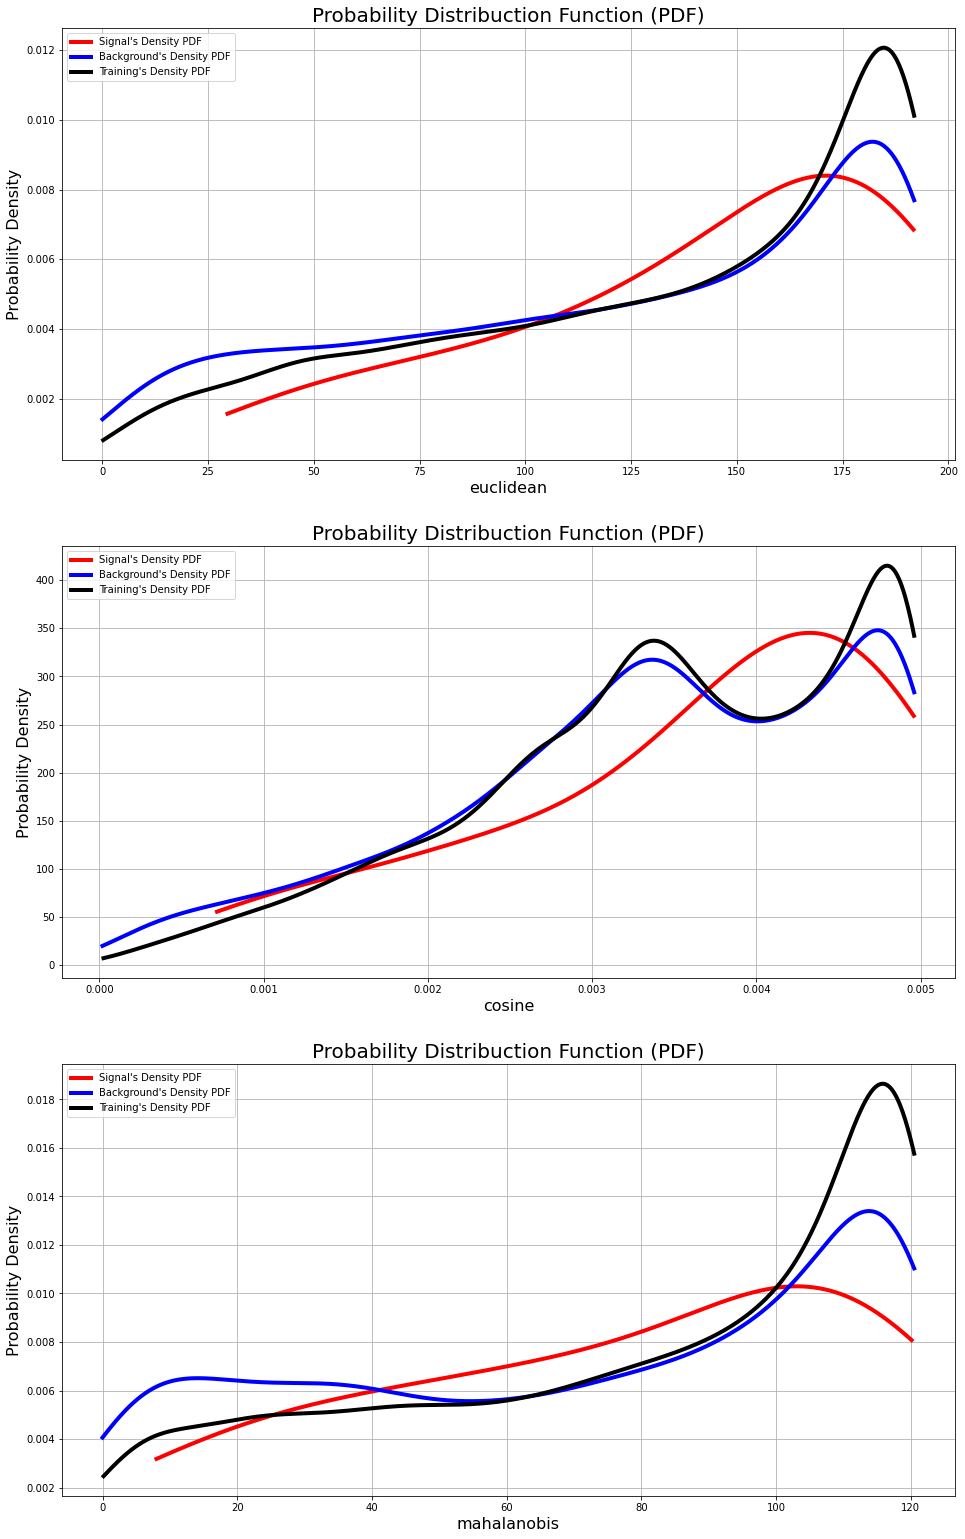

In [8]:
fig = plt.figure(figsize=[16,9*(len(distances_dict))])
ax = fig.subplots(len(distances_dict))

for i, att in enumerate(distances_dict):
    print(att)
        
    signal_streaming_var = distances_dict[att]['eda']['sg']
    background_streaming_var = distances_dict[att]['eda']['bc']
    training_var = distances_dict[att]['eda']['tn']
    
    signal_streaming_var = np.sort(signal_streaming_var)
    background_streaming_var = np.sort(background_streaming_var)
    training_var = np.sort(training_var)

    signal_kde = stats.gaussian_kde(signal_streaming_var)
    background_kde = stats.gaussian_kde(background_streaming_var)
    training_kde = stats.gaussian_kde(training_var)
    
    print('       fitted kde')
    
    training_eval = np.linspace(min(training_var),
                            max(training_var),
                            1000)
    
    background_eval = np.linspace(min(background_streaming_var),
                            max(background_streaming_var), 
                            1000)
    
    signal_eval = np.linspace(min(signal_streaming_var),
                              max(signal_streaming_var),
                              1000)

    # Plot the Probability Distribuction Function (PDF)
    
    ax[i].set_ylabel('Probability Density',fontsize=16)
    ax[i].set_xlabel(att,fontsize=16)
    ax[i].set_title('Probability Distribuction Function (PDF)',fontsize=20)
        
    ax[i].plot(signal_eval, signal_kde(signal_eval),'r', linewidth=4, label='Signal\'s Density PDF')
    
    ax[i].plot(background_eval, background_kde(background_eval),'b', linewidth=4, 
               label='Background\'s Density PDF')
    
    ax[i].plot(training_eval, training_kde(training_eval),'k', linewidth=4, 
               label='Training\'s Density PDF')

    ax[i].grid()
    ax[i].legend()
    
    print('        plotted')
    
plt.show()
fig.savefig('EDA_supervised_posterior_P.pdf', bbox_inches='tight')

euclidean
       fitted kde
        plotted
cosine
       fitted kde
        plotted
mahalanobis
       fitted kde
        plotted


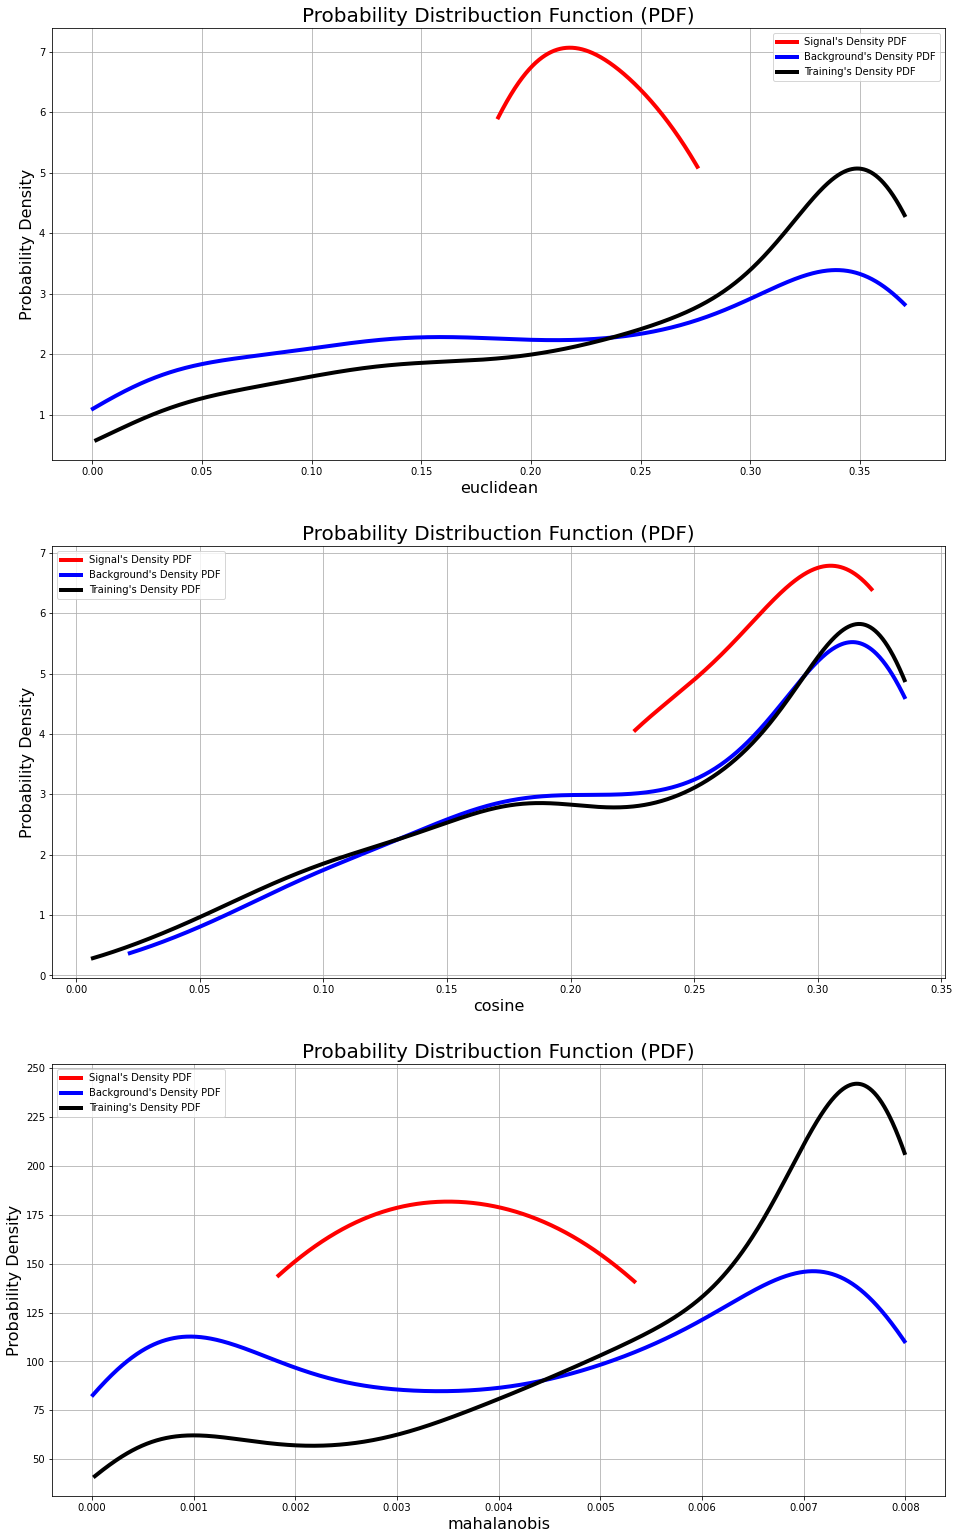

In [31]:
fig = plt.figure(figsize=[16,9*(len(distances_dict))])
ax = fig.subplots(len(distances_dict))

for i, att in enumerate(distances_dict):
    print(att)
        
    signal_streaming_var = distances_dict[att]['posterior']['sg']
    background_streaming_var = distances_dict[att]['posterior']['bc']
    training_var = distances_dict[att]['posterior']['tn']
    
    signal_streaming_var = np.sort(signal_streaming_var)
    background_streaming_var = np.sort(background_streaming_var)
    training_var = np.sort(training_var)

    signal_kde = stats.gaussian_kde(signal_streaming_var)
    background_kde = stats.gaussian_kde(background_streaming_var)
    training_kde = stats.gaussian_kde(training_var)
    
    print('       fitted kde')
    
    training_eval = np.linspace(min(training_var),
                            max(training_var),
                            1000)
    
    background_eval = np.linspace(min(background_streaming_var),
                            max(background_streaming_var), 
                            1000)
    
    signal_eval = np.linspace(min(signal_streaming_var),
                              max(signal_streaming_var),
                              1000)

    # Plot the Probability Distribuction Function (PDF)
    
    ax[i].set_ylabel('Probability Density',fontsize=16)
    ax[i].set_xlabel(att,fontsize=16)
    ax[i].set_title('Probability Distribuction Function (PDF)',fontsize=20)
        
    ax[i].plot(signal_eval, signal_kde(signal_eval),'r', linewidth=4, label='Signal\'s Density PDF')
    
    ax[i].plot(background_eval, background_kde(background_eval),'b', linewidth=4, 
               label='Background\'s Density PDF')
    
    ax[i].plot(training_eval, training_kde(training_eval),'k', linewidth=4, 
               label='Training\'s Density PDF')

    ax[i].grid()
    ax[i].legend()
    
    print('        plotted')
    
plt.show()
fig.savefig('EDA_supervised_posterior_P.pdf', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=[16,9*(len(distances_dict)-3)])
ax = fig.subplots(len(distances_dict)-3)

for i, att in enumerate(distances_dict):
    print(att)
    
    if att == 'euclidean':
        signal_streaming_var = distances_dict[att]['eda']['sg']
        background_streaming_var = distances_dict[att]['eda']['bc']
        
    else:
        break
        
    
    signal_streaming_var = np.sort(signal_streaming_var)
    background_streaming_var = np.sort(background_streaming_var)

    signal_kde = stats.gaussian_kde(signal_streaming_var)
    background_kde = stats.gaussian_kde(background_streaming_var)
    
    print('       fitted kde')
    
    data_eval = np.linspace(min(min(background_streaming_var),min(signal_streaming_var)),
                            max(max(background_streaming_var),max(signal_streaming_var)),
                            1000)
    
    background_eval = np.linspace(min(background_streaming_var),
                            max(background_streaming_var), 
                            1000)
    signal_eval = np.linspace(min(signal_streaming_var),
                              max(signal_streaming_var),
                              1000)

    # Plot the Probability Distribuction Function (PDF)
    
    ax.set_ylabel('Probability Density',fontsize=16)
    ax.set_xlabel(att,fontsize=16)
    ax.set_title('Probability Distribuction Function (PDF)',fontsize=20)
        
    ax.plot(signal_eval, signal_kde(signal_eval),'r', linewidth=4, label='Signal\'s Density PDF')
    ax.plot(background_eval, background_kde(background_eval),'b', linewidth=4, 
               label='Background\'s Density PDF')

    ax.grid()
    ax.legend()
    
    print('        plotted')
    
plt.show()
fig.savefig('euclidean_Bayes_EDA_PDF.png', bbox_inches='tight')

In [35]:
a = np.array(([1,2,3],[4,5,6]))
b = np.array(([1,2,3],[4,5,6]))
c = np.array(([1,2,3]))

In [36]:
(a+b)*c

array([[ 2,  8, 18],
       [ 8, 20, 36]])